In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.spatial.distance import cdist

In [20]:
df_linear = pd.read_csv("linear_dataset.csv")
df_lwr = pd.read_csv("lwr_dataset.csv")
df_poly = pd.read_csv("polynomial_dataset.csv")

In [21]:
def linear_regression(df):
 X, y = df[['X']], df['Y']
 model = LinearRegression()
 model.fit(X, y)
 y_pred = model.predict(X)
 plt.scatter(X, y, label='Data')
 plt.plot(X, y_pred, color='red', label='Linear Regression')
 plt.legend()
 plt.title("Linear Regression")
 plt.show()

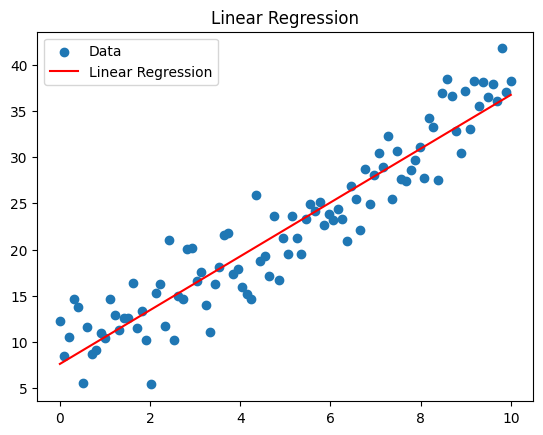

In [22]:
linear_regression(df_linear)

In [23]:
def gaussian_kernel(x, X, tau):
 return np.exp(-cdist([[x]], X, 'sqeuclidean') / (2 * tau**2))

In [24]:
def locally_weighted_regression(X_train, y_train, tau=0.5):
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) #
    X_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
    y_pred = []
    for x in X_range:
        x_vec = np.array([1, x]) 
        weights = gaussian_kernel(x, X_train[:, 1:], tau).flatten()
        W = np.diag(weights)
        theta = np.linalg.pinv(X_train.T @ W @ X_train) @ (X_train.T @ W @y_train)
        y_pred.append(x_vec @ theta)
    plt.scatter(X_train[:, 1], y_train, label='Data')
    plt.plot(X_range, y_pred, color='red', label='LWR')
    plt.legend()
    plt.title("Locally Weighted Regression")
    plt.show()

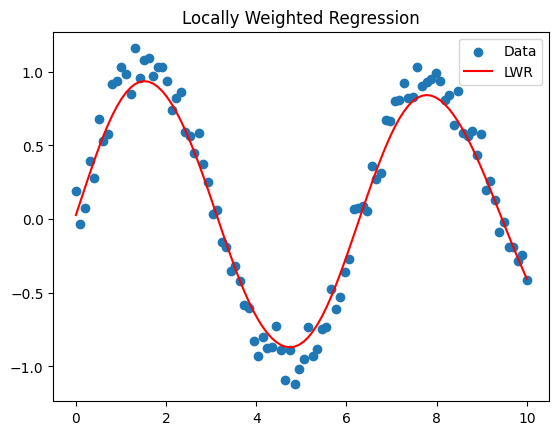

In [25]:
locally_weighted_regression(df_lwr[['X']].values, df_lwr['Y'].values)

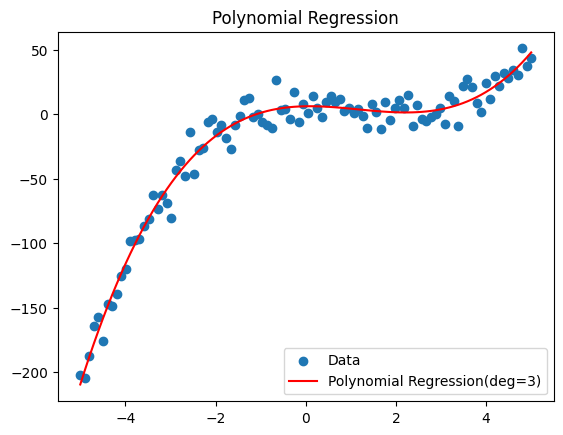

In [28]:
def polynomial_regression(df, degree=3):
 X, y = df[['X']],df['Y']
 model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
 model.fit(X, y)
 y_pred = model.predict(X)
 plt.scatter(X, y, label='Data')
 plt.plot(X, y_pred, color='red', label=f'Polynomial Regression(deg={degree})')
 plt.legend()
 plt.title("Polynomial Regression")
 plt.show()
polynomial_regression(df_poly, degree=3)